In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt. timedelta(days = 365*years)
assets = ["VTI", "SPY", "QQQ", "BND", "GLD"]
df = yf.download(assets, start=startDate, end=endDate, auto_adjust=False)["Adj Close"]
print(f"\nData Shape: {df.shape}")
# Display first and last few rows
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

[*********************100%***********************]  5 of 5 completed


Data Shape: (3771, 5)

First 5 rows:
Ticker            BND         GLD        QQQ        SPY        VTI
Date                                                              
2010-06-03  52.313038  117.959999  40.764759  84.130669  43.270866
2010-06-04  52.456688  119.190002  39.367825  81.174568  41.751122
2010-06-07  52.619923  121.489998  38.651878  80.163872  41.071430
2010-06-08  52.600357  121.000000  38.582031  81.022591  41.422733
2010-06-09  52.600357  120.559998  38.258987  80.589447  41.231815

Last 5 rows:
Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2025-05-22  72.080002  303.109985  514.000000  583.090027  286.720001
2025-05-23  72.190002  309.750000  509.239990  579.109985  285.040009
2025-05-27  72.529999  304.500000  521.219971  591.150024  290.899994
2025-05-28  72.370003  303.809998  518.909973  587.729980  289.190002
2025-05-29  72.635002  306.119598  519.632324  589.075012  

In [5]:
log_returns = np.log(df/df.shift(1)).dropna()
portfolio_value = 1000000
weights = np.array([1/len(assets)]*len(assets))
print(weights)


[0.2 0.2 0.2 0.2 0.2]


In [18]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

days = 5
range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)


historical_x_day_returns = historical_returns.rolling(window = days).sum()

Date
2010-06-04   -0.018655
2010-06-07   -0.005015
2010-06-08    0.002590
2010-06-09   -0.004406
2010-06-10    0.013968
                ...   
2025-05-22   -0.000807
2025-05-23    0.000233
2025-05-27    0.010357
2025-05-28   -0.004123
2025-05-29    0.003382
Length: 3770, dtype: float64
Date
2010-06-10   -0.011519
2010-06-11    0.013287
2010-06-14    0.017350
2010-06-15    0.030962
2010-06-16    0.035278
                ...   
2025-05-22   -0.004687
2025-05-23   -0.005656
2025-05-27    0.001629
2025-05-28   -0.003827
2025-05-29    0.009042
Length: 3766, dtype: float64


In [8]:
cov_matrix =log_returns.cov()*252
portfolio_std_dev = np.sqrt(weights.T@cov_matrix@weights)

In [16]:
confidence_levels = [0.9, 0.95, 0.99]

from scipy.stats import norm
VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) *np.sqrt(days/252)
    VaRs.append(VaR)

print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)
# Print each confidence level and its corresponding VaR value
for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl*100:>6.0f}%:{"":<8} ${VaR:>10,.2f}')



Confidence Level     Value at Risk       
----------------------------------------
    90%:         $ 21,203.06
    95%:         $ 27,213.83
    99%:         $ 38,489.04


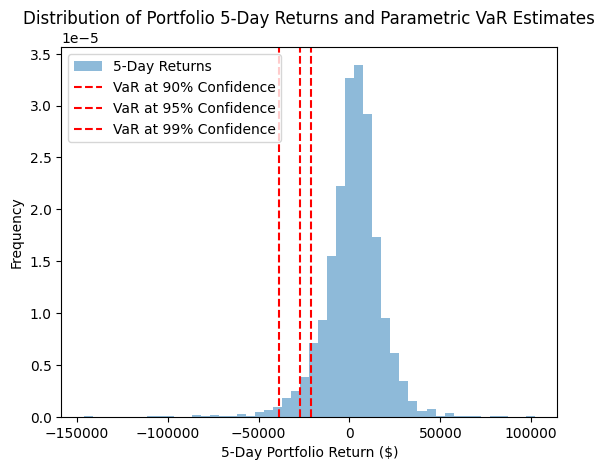

In [19]:
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for c1, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label=f'VaR at {int(c1 * 100)}% Confidence')

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()
